# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|██████████| 9.91M/9.91M [00:00<00:00, 92.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 30.4MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 76.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.56MB/s]


Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.4166, -0.4941,  1.0880,  0.3325,  0.3496,  0.1238,  1.1039,  1.0566,
          0.7896, -0.2339]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [8]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.4150)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

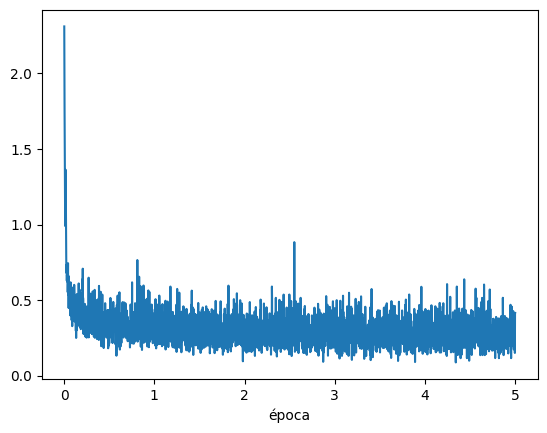

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

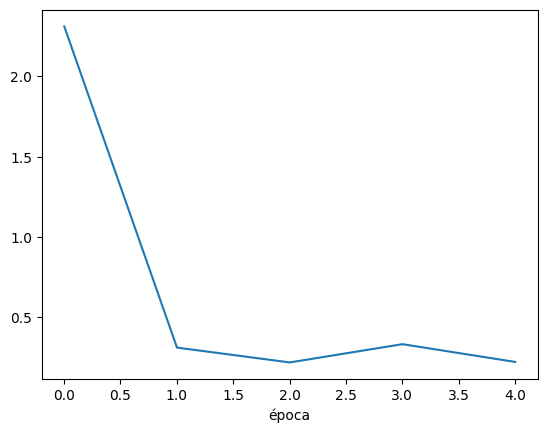

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
2. Em uma época, quantos mini-batches existem?
3. Qual é a definição de época?

## 1.
Qual é o tamanho do mini-batch?

100

## 2.
Em uma época, quantos mini-batches existem?

600

## 3.
Qual é a definição de época?

O parametro que afere a passagem completa de todos os dados de treinamento pelo modelo.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

## 1
Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
Época: 1/4, batch: 600

In [16]:
total_trained_samples = 0
num_epochs = 4
for i in range(num_epochs):
    for k, (x_train, y_train) in enumerate(loader_train):

        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        # Print a cada minibatch
        if (k + 1) % 1 == 0:
            print(f'Época: {i+1}/{num_epochs}, batch: {k+1}/{len(loader_train)}')

print('Final loss:', loss.data)


Época: 1/4, batch: 1/600
Época: 1/4, batch: 2/600
Época: 1/4, batch: 3/600
Época: 1/4, batch: 4/600
Época: 1/4, batch: 5/600
Época: 1/4, batch: 6/600
Época: 1/4, batch: 7/600
Época: 1/4, batch: 8/600
Época: 1/4, batch: 9/600
Época: 1/4, batch: 10/600
Época: 1/4, batch: 11/600
Época: 1/4, batch: 12/600
Época: 1/4, batch: 13/600
Época: 1/4, batch: 14/600
Época: 1/4, batch: 15/600
Época: 1/4, batch: 16/600
Época: 1/4, batch: 17/600
Época: 1/4, batch: 18/600
Época: 1/4, batch: 19/600
Época: 1/4, batch: 20/600
Época: 1/4, batch: 21/600
Época: 1/4, batch: 22/600
Época: 1/4, batch: 23/600
Época: 1/4, batch: 24/600
Época: 1/4, batch: 25/600
Época: 1/4, batch: 26/600
Época: 1/4, batch: 27/600
Época: 1/4, batch: 28/600
Época: 1/4, batch: 29/600
Época: 1/4, batch: 30/600
Época: 1/4, batch: 31/600
Época: 1/4, batch: 32/600
Época: 1/4, batch: 33/600
Época: 1/4, batch: 34/600
Época: 1/4, batch: 35/600
Época: 1/4, batch: 36/600
Época: 1/4, batch: 37/600
Época: 1/4, batch: 38/600
Época: 1/4, batch: 39

## 2.
Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

###  Função para o treinamento

In [20]:
# Função para o treinamento
def train_with_batch_size(batch_size):

    epochs = []
    losses = []
    total_trained_samples = 0
    num_epochs = 4

    # Laço de treinamento
    for i in range(num_epochs):
        for k, (x_train, y_train) in enumerate(loader_train):
            inputs = Variable(x_train.view(-1, 28 * 28))
            outputs = model(inputs)
            loss = criterion(outputs, Variable(y_train))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_trained_samples += x_train.size(0)
            epochs.append(total_trained_samples / len(dataset_train))
            losses.append(loss.data)

            # Print a cada minibatch
            if (k + 1) % 1 == 0:
                print(f'Época: {i+1}/{num_epochs}, batch: {k+1}/{len(loader_train)}')

    return epochs, losses

## 2.
Refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

Streaming output truncated to the last 5000 lines.
Época: 4/4, batch: 403/600
Época: 4/4, batch: 404/600
Época: 4/4, batch: 405/600
Época: 4/4, batch: 406/600
Época: 4/4, batch: 407/600
Época: 4/4, batch: 408/600
Época: 4/4, batch: 409/600
Época: 4/4, batch: 410/600
Época: 4/4, batch: 411/600
Época: 4/4, batch: 412/600
Época: 4/4, batch: 413/600
Época: 4/4, batch: 414/600
Época: 4/4, batch: 415/600
Época: 4/4, batch: 416/600
Época: 4/4, batch: 417/600
Época: 4/4, batch: 418/600
Época: 4/4, batch: 419/600
Época: 4/4, batch: 420/600
Época: 4/4, batch: 421/600
Época: 4/4, batch: 422/600
Época: 4/4, batch: 423/600
Época: 4/4, batch: 424/600
Época: 4/4, batch: 425/600
Época: 4/4, batch: 426/600
Época: 4/4, batch: 427/600
Época: 4/4, batch: 428/600
Época: 4/4, batch: 429/600
Época: 4/4, batch: 430/600
Época: 4/4, batch: 431/600
Época: 4/4, batch: 432/600
Época: 4/4, batch: 433/600
Época: 4/4, batch: 434/600
Época: 4/4, batch: 435/600
Época: 4/4, batch: 436/600
Época: 4/4, batch: 437/600
Époc

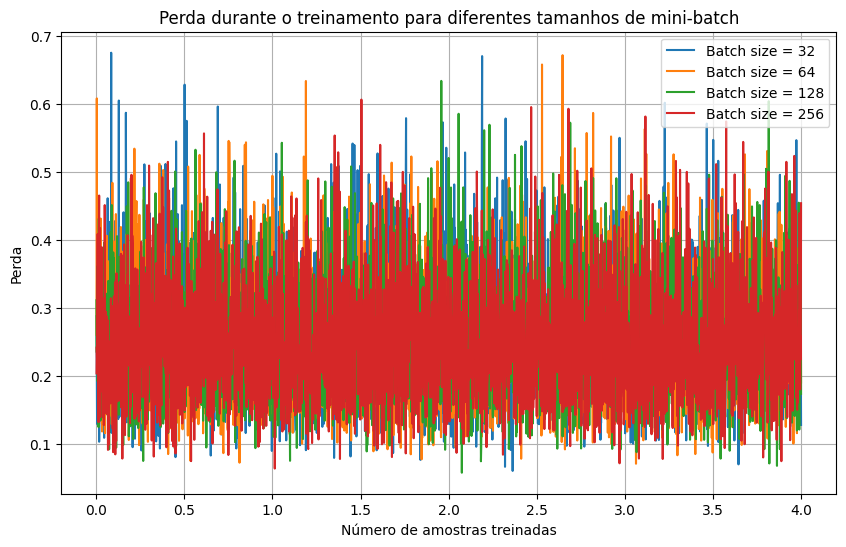

In [21]:
# Definindo tamanhos de mini-batch para testar
batch_sizes = [32, 64, 128, 256]

# Gráfico para comparar a perda para cada batch_size
plt.figure(figsize=(10, 6))

for batch_size in batch_sizes:
    print(f"Treinando com batch_size = {batch_size}")
    epochs, losses = train_with_batch_size(batch_size)
    plt.plot(epochs, losses, label=f'Batch size = {batch_size}')

plt.xlabel('Número de amostras treinadas')
plt.ylabel('Perda')
plt.title('Perda durante o treinamento para diferentes tamanhos de mini-batch')
plt.legend()
plt.grid(True)
plt.show()


## Conclusões sobre os experimentos deste notebook


Como o tamanho do mini-batch pode impactar o treinamento de um modelo de rede neural e exemplificou como o treinamento de um modelo de rede neural pode ser dividido em várias épocas, com a perda sendo calculada e atualizada a cada mini-batch